In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import numpy as np
import math as m
import matplotlib.pyplot as plt
import dive 
import deerlab as dl
from scipy.io import loadmat

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Load and display data

In [2]:
loaded_data = np.genfromtxt("../../data/3992_good.dat", skip_header = 1, delimiter = ',')
Pid = 3992
t = loaded_data[:,0]
Vexp = loaded_data[:,1]

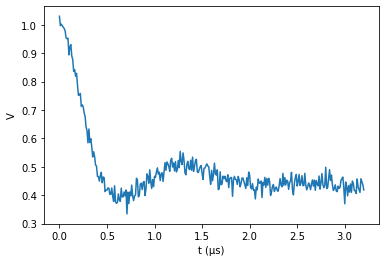

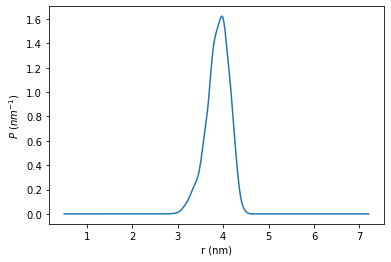

In [3]:
plt.plot(t, Vexp)
plt.xlabel('t (µs)')
plt.ylabel('V')
plt.show()

P0s = loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['P0']
rref = np.squeeze(loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['r0'])
Pref = P0s[Pid-1,:]

plt.plot(rref, Pref)
plt.xlabel('r (nm)')
plt.ylabel(r'$P~(nm^{-1})$')
plt.show()



## rmin = 20 Å

In [5]:
pars = {"method": 'regularization', "r": np.linspace(2,6,200)}

model_1 = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 5000,"tune": 1000, "chains": 4, 'cores': 4}
trace_1 = dive.sample(model_1,MCMCparameters)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randDelta: [delta]
>NUTS: [k, V0, lamb, sigma]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 1425 seconds.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
The number of effective samples is smaller than 10% for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k,0.046,0.004,0.039,0.053,0.000,0.000,5817.0,7162.0,1.00
λ,0.512,0.005,0.502,0.521,0.000,0.000,3971.0,6190.0,1.00
V₀,0.987,0.008,0.972,1.002,0.000,0.000,4208.0,6539.0,1.00
σ,0.020,0.001,0.019,0.022,0.000,0.000,9269.0,9039.0,1.00
δ,8185.665,3657.458,2272.961,14769.172,137.717,97.421,638.0,1076.0,1.01
lg(α),0.243,0.097,0.062,0.432,0.004,0.003,657.0,1056.0,1.01


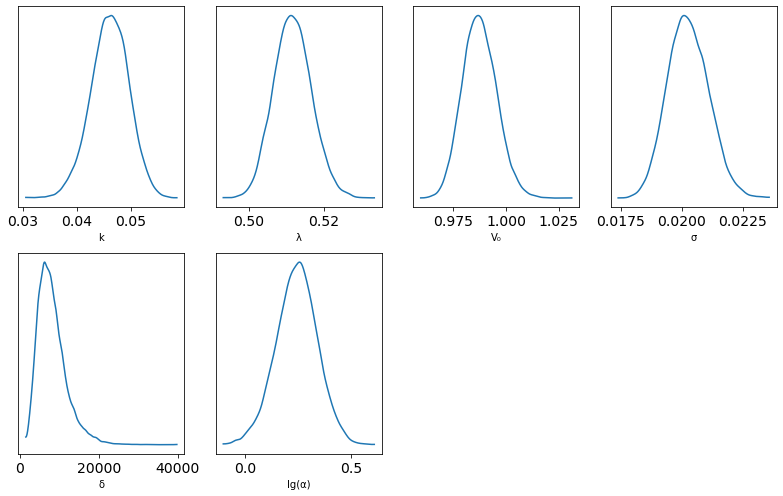

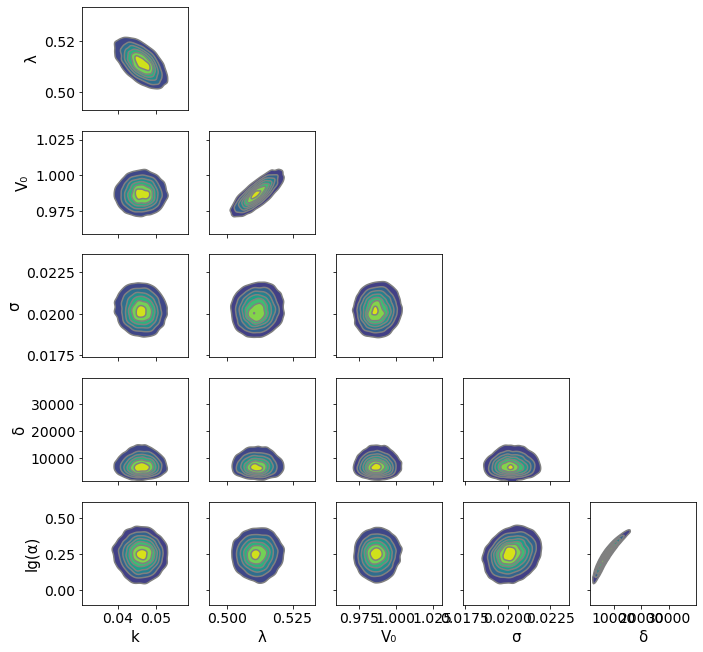

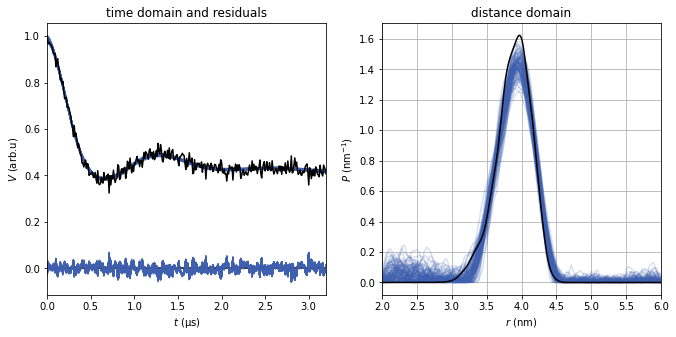

In [6]:
dive.summary(trace_1, model_1, Pid = Pid)  

## rmin = 0.01 Å

In [8]:
pars = {"method": 'regularization', "r": np.linspace(0.001,6,300)}

model2 = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 5000,"tune": 1000, "chains": 4, 'cores': 4}
trace2 = dive.sample(model2,MCMCparameters)

Sequential sampling (4 chains in 1 job)
CompoundStep
>SamplePfromV: [P]
>randDelta: [delta]
>NUTS: [k, V0, lamb, sigma]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 6520 seconds.
The number of effective samples is smaller than 10% for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
k,0.046,0.003,0.039,0.052,0.000,0.000,5668.0,6566.0,1.00
λ,0.528,0.008,0.514,0.542,0.000,0.000,1333.0,2544.0,1.00
V₀,1.022,0.015,0.994,1.049,0.000,0.000,1233.0,2350.0,1.00
σ,0.020,0.001,0.019,0.022,0.000,0.000,8208.0,8740.0,1.00
δ,12003.934,5045.900,3742.770,21447.838,229.359,162.279,457.0,721.0,1.01
lg(α),0.328,0.094,0.144,0.502,0.004,0.003,471.0,770.0,1.01


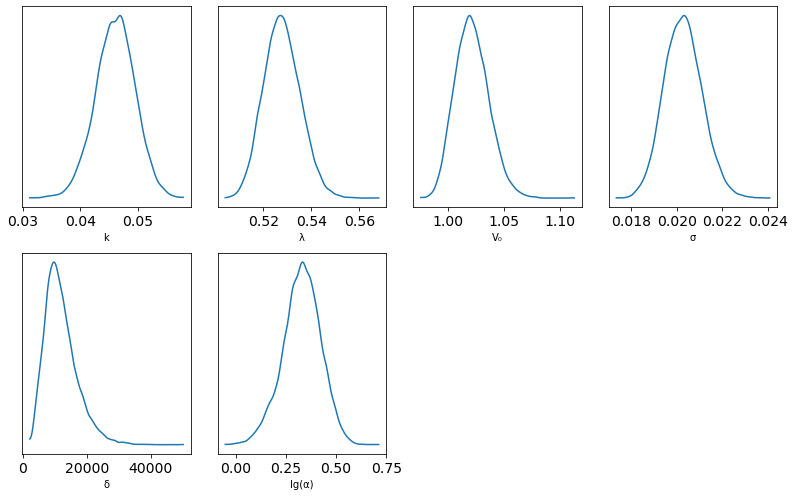

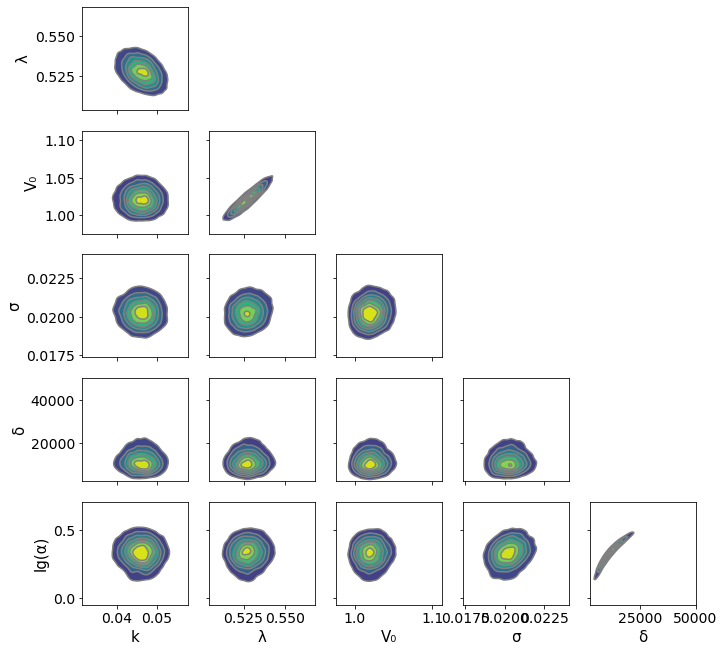

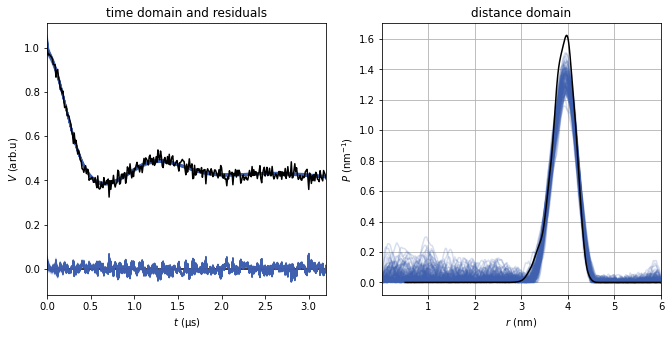

In [9]:
dive.summary(trace2, model2, Pid = Pid)  

## short distances plus third data points

In [11]:
Vprune = Vexp[::3] 
tprune = t[::3]

pars = {"method": 'regularization', "r": np.linspace(0.001,6,300)}

model3 = dive.model(tprune, Vprune, pars)

MCMCparameters = {"draws": 5000,"tune": 1000, "chains": 4, 'cores': 4}
trace3 = dive.sample(model3,MCMCparameters)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randDelta: [delta]
>NUTS: [k, V0, lamb, sigma]


ValueError: Not enough samples to build a trace.

In [ ]:
dive.summary(trace3, model3, Pid = Pid)  